In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as spt  
import numpy.fft as npt

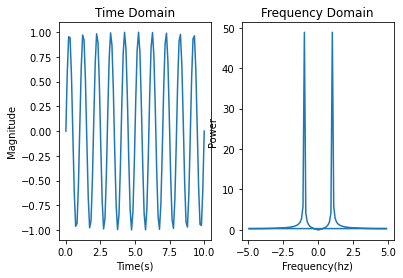

In [161]:
def F(t,Y, xlimt='none', xlimf='none', plot='yes', output='no', absolute='yes',norm='no'):
    f=np.size(t)/(np.amax(t)-np.amin(t))*spt.fftfreq(np.size(t))
    if absolute=='no':                   #plotting non-absolute is better for composition
        if norm=='yes':                  #found code online normalised this way so added it as an optional parameter
            A=(spt.fft(Y))/np.size(t)
        if norm=='no':
            A=(spt.fft(Y))
    if absolute=='yes': #plotting absolute makes graphs more readible
        if norm=='yes':
            A=abs(spt.fft(Y))/np.size(t)
        if norm=='no':
            A=abs(spt.fft(Y))
    
    if plot=='yes':          #plotting after each fourier transform can be turned off for composition
        plt.subplot(1,2,1)
        plt.plot(t,Y)
        plt.xlabel('Time(s)')
        if xlimt!='none':
            plt.xlim([-xlimt,xlimt])
        plt.ylabel('Magnitude')
        plt.title('Time Domain')
    
        plt.subplot(1,2,2)
        plt.plot(f,A)
        if xlimf!='none':
            plt.xlim([-xlimf,xlimf])
        plt.xlabel('Frequency(hz)')
        plt.ylabel('Power')
        plt.title('Frequency Domain')
    if output=='yes':
        return f,A

t0=np.linspace(0,10,100)  #several functions that have been tested
y0=np.sin(2*np.pi*t0)
    
t1=np.linspace(0,10,100)
y1=np.cos(2*np.pi*t1)
      
t2=np.linspace(0,10,100)
y2=np.zeros(100)
for i in range(48,52):
    y2[i]=1
    
t3=np.linspace(0,10,100)
y3=np.zeros(100)
y3[50]=1

t4=np.linspace(0,10,100)
y4=np.cos(2*np.pi*t0)+np.sin(4*np.pi*t0)

t5=np.linspace(0,10,100)
y5=np.cos(2*np.pi*t0)+5

plot1=F(t0,y0) #change the inputs to transform each function (eg. try F(t2,y2))


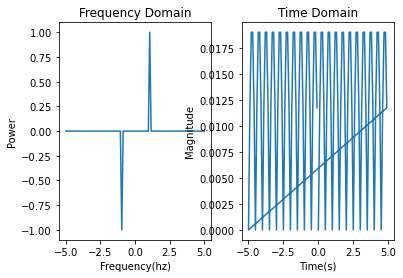

In [162]:
def invF(f,A,xlimf='none',xlimt='none', plot='yes', output='no', absolute='yes',norm='no'): #same as last cell but for inverse transform
    t=np.size(f)/(np.amax(f)-np.amin(f))*spt.fftfreq(np.size(f))
    if absolute=='no':
        if norm=='yes':
            Y=(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y=(spt.ifft(A))
    if absolute=='yes':
        if norm=='yes':    
            Y=abs(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y=abs(spt.ifft(A))
    
    
    if plot=='yes':
        plt.subplot(1,2,1)
        plt.plot(f,A)
        if xlimf!='none':
            plt.xlim([-xlimf,xlimf])
        plt.xlabel('Frequency(hz)')
        plt.ylabel('Power')
        plt.title('Frequency Domain')
    
        plt.subplot(1,2,2)
        plt.plot(t,Y)
        if xlimt!='none':
            plt.xlim([-xlimt,xlimt])
        plt.xlabel('Time(s)')
        plt.ylabel('Magnitude')
        plt.title('Time Domain')
    
    if output=='yes':
        return t,Y
    
f0=np.linspace(-5,5,100)
A0=np.sinc(0.5*np.pi*f0)

f1=np.linspace(-5,5,100)
A1=np.zeros(100)
A1[40]=-1
A1[60]=1

f2=np.linspace(-5,5,100)
A2=np.zeros(100)
A2[40]=1
A2[60]=1

f3=np.linspace(-5,5,100)
A3=np.ones(100)


invF(f1,A1,xlimf='none',xlimt='none') #frequency is actually 1 but appears to be 0.5 since absolute value is plotted

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9 -5.  -4.9 -4.8 -4.7 -4.6 -4.5
 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1
 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7
 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3
 -0.2 -0.1]


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


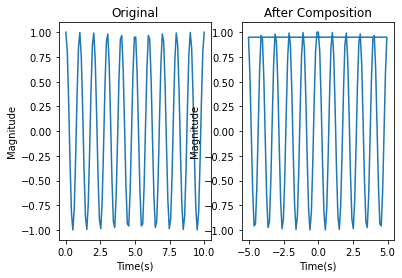

In [157]:
t0=np.linspace(0,10,100)
y0=np.zeros(100)
y0[50]=1

t1=np.linspace(0,10,100)
y1=np.cos(2*np.pi*t1)

t2=np.linspace(0,10,1000)
y2=np.zeros(1000)
for i in range(480,520):
    y2[i]=1

t3=np.linspace(-5,5,100)
y3=np.zeros(100)
y3[40]=1
y3[60]=1    

def compose(t,y):    #composition inverse transform of transform. works for sine and cosine only with shifted domains
    plt.subplot(1,2,1)
    plt.plot(t,y)
    plt.xlabel('Time(s)')
    plt.ylabel('Magnitude')
    plt.title('Original')
    x1,y1=F(t,y,plot='no',output='yes',absolute='no')
    print(x1)
    x2,y2=invF(x1,y1,plot='no',absolute='no', output='yes')
    plt.subplot(1,2,2)
    plt.plot(x2,y2)
    plt.xlabel('Time(s)')
    plt.ylabel('Magnitude')
    plt.title('After Composition')

compose(t1,y1)

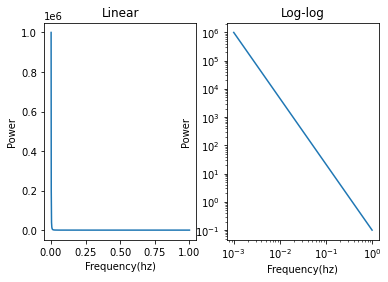

In [158]:
def P(f):  # model extracted from arXiv:1603.04461v1 figure 3
    return 0.1*f**(-7/3)
f=np.linspace(0.001,1,1000)
#f=np.linspace(0.001,1,999999)
#w=2*np.pi*f
P=P(f)
#q=input('0 for linear; 1 for log-log')
#if q==0:
plt.subplot(1,2,1)
#plt.plot(w,P)
plt.plot(f,P)
plt.title('Linear')
#plt.xlabel('Angular Frequency(rad/s)')
plt.xlabel('Frequency(hz)')
plt.ylabel('Power')
#if q==1:
plt.subplot(1,2,2)
#plt.loglog(w,P)
plt.loglog(f,P)
plt.title('Log-log')
#plt.xlabel('Angular Frequency(rad/s)')
plt.xlabel('Frequency(hz)')
plt.ylabel('Power')
plt.show()

Text(0.5, 1.0, 'Log-log')

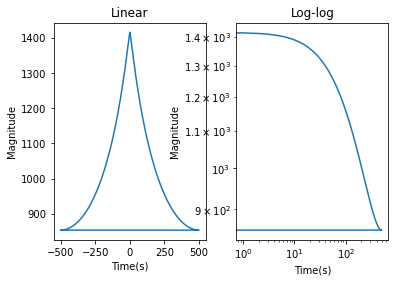

In [159]:
#invF(f,P)
x,y=invF(f,P,output='yes',plot='no')  #inverse fourier transform applied to model
plt.subplot(1,2,1)
plt.plot(x,y)
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.title('Linear')



plt.subplot(1,2,2)
plt.loglog(x,y)
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.title('Log-log')